# Data exploration

In [ ]:
!pip install geopandas rtree # install necessary packages

import geopandas as gpd
import pandas as pd
import rtree
import os
import pickle

print(os.getcwd())

# To mount the raw data and save it using pickle:
# data = gpd.read_file('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/ookla-canada-speed-tiles.shp')
# with open('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/canada-speed-data.p', 'wb') as file:
#    pickle.dump(data, file)

# To load the data 
with open('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/canada-speed-data.p', 'rb') as file: 
    data = pickle.load(file) 
data.head(5)

     |████████████████████████████████| 1.0 MB 3.6 MB/s 
     |████████████████████████████████| 994 kB 24.1 MB/s 
     |████████████████████████████████| 16.7 MB 255 kB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
/content


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0023331133131332,11910,1408,27,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4593360.869 4089469.904, 4593533.055..."
1,0023331133133011,14969,1554,25,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4592705.709 4089714.238, 4592877.874..."
2,0032202103303220,5038,1317,54,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010054,8,330.0,None,None,None,None,"POLYGON ((4736491.486 4146142.702, 4736658.777..."
3,0032220031120102,13419,6169,50,4,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,None,None,None,None,"POLYGON ((4642710.684 4070147.116, 4642884.538..."
4,0032220031120103,13587,1095,28,2,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,0388,Inuvik,4,2,"POLYGON ((4642884.538 4070012.633, 4643058.404..."


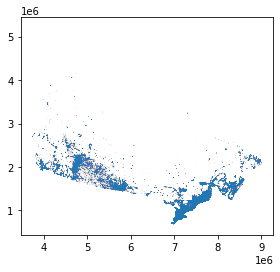

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot()

In [ ]:
# check data shape
print("data shape:{shape}".format(shape=data.shape),"\n", "data columns:{columns}".format(columns=list(data)))

data shape:(2751464, 21) 
 data columns:['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME', 'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS', 'geometry']


# Split the data by municipalities

In [ ]:
# Task: split the data by PRNAME, save them separately.

# 1. Get the list of unique PRNAMES
provinces = data['PRNAME'].unique().tolist()
print(provinces)

# 2. Select * from data where PRNAME=='Yukon' ## example case
print(data[data['PRNAME']=='Yukon'].shape)


['Northwest Territories / Territoires du Nord-Ouest', 'Yukon', 'British Columbia / Colombie-Britannique', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 'Newfoundland and Labrador / Terre-Neuve-et-Labrador', 'Quebec / Québec', 'New Brunswick / Nouveau-Brunswick', 'Nova Scotia / Nouvelle-Écosse', 'Prince Edward Island / Île-du-Prince-Édouard', 'Nunavut']
(2696, 21)


In [ ]:
# 3. Select * from data where PRNAME == each provice, then save the output as .shp file in each folder named after the province

province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
                  'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
                  'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
                  'Nova Scotia', 'Prince Edward Island', 'Nunavut']

for i, p in enumerate(provinces):
    
    # extract data
    print("Extracting: {p_name}".format(p_name = p))
    temp_d = data[data['PRNAME']==p]
    
    # create province directory
    province_n = province_names[i]
    province_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/'
    if os.path.exists(province_dir):
        os.rmdir(province_dir)    
    os.mkdir(province_dir)
    
    # set output file path
    out_file_path = province_dir + province_n + '-speed-tiles.shp'

    # write .shp file
    temp_d.to_file(out_file_path)

In [ ]:
os.mkdir('')

In [ ]:
## split the data more: by year and quarter

import shutil

os.chdir('/content/drive/MyDrive/shared/2022-ssc-case-comp/')
os.getcwd()

provinces = data['PRNAME'].unique().tolist() # different from 'province_names' below'

province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
                  'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
                  'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
                  'Nova Scotia', 'Prince Edward Island', 'Nunavut']

years = data['year'].unique()
quarters = data['quarter'].unique()

for i, p in enumerate(provinces):
    
    # locate province directory
    province_n = province_names[i]
    province_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/'
    year_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/by_year_quarter/'
    
    # create year and quarter directories
    if os.path.exists(year_dir):
        shutil.rmtree(year_dir, ignore_errors=True)
    os.mkdir(year_dir)

    for year in years:
        
        for quarter in quarters:

            # extract data
            print("Extracting: {p_name}-{year}-{quarter}".format(p_name = province_names[i], year=year, quarter=quarter))
            cond = (data['PRNAME']==p) & (data['year'] == year) & (data['quarter'] ==quarter)
            temp_d = data[cond]
            
            # set output file path
            out_file_shp = year_dir + province_n + '-' + str(year) + '-' + quarter + '.shp'
            out_file_csv = year_dir + province_n + '-' + str(year) + '-' + quarter + '.csv'

            try:
                temp_d.to_file(out_file_shp)  # write .shp file
                temp_d.to_csv(out_file_csv,index=False, mode='w') # write .csv file
            except ValueError:
                pass         

print('done!')

Extracting: Northwest Territories-2019-Q1
Extracting: Northwest Territories-2019-Q2
Extracting: Northwest Territories-2019-Q3
Extracting: Northwest Territories-2019-Q4
Extracting: Northwest Territories-2020-Q1
Extracting: Northwest Territories-2020-Q2
Extracting: Northwest Territories-2020-Q3
Extracting: Northwest Territories-2020-Q4
Extracting: Northwest Territories-2021-Q1
Extracting: Northwest Territories-2021-Q2
Extracting: Northwest Territories-2021-Q3
Extracting: Northwest Territories-2021-Q4
Extracting: Yukon-2019-Q1
Extracting: Yukon-2019-Q2
Extracting: Yukon-2019-Q3
Extracting: Yukon-2019-Q4
Extracting: Yukon-2020-Q1
Extracting: Yukon-2020-Q2
Extracting: Yukon-2020-Q3
Extracting: Yukon-2020-Q4
Extracting: Yukon-2021-Q1
Extracting: Yukon-2021-Q2
Extracting: Yukon-2021-Q3
Extracting: Yukon-2021-Q4
Extracting: British Columbia-2019-Q1
Extracting: British Columbia-2019-Q2
Extracting: British Columbia-2019-Q3
Extracting: British Columbia-2019-Q4
Extracting: British Columbia-2020-Q1

# Merge census division data with the CD boundary data

Here, we merge the download data grouped by the census division with the boundary data obtained from https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm


1. Load the original case study data.
2. Load the boundary data.
3. Group the case study data by 'CDUID' using makeData module created by Daisy.
4. Extract conn_type='fixed'.
5. Merge the extracted datafram with the boundary data.

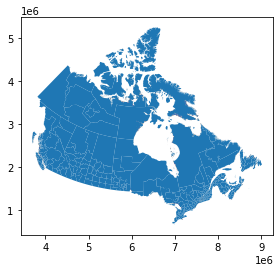

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas --quiet
import os
import pandas as pd
import pickle
import geopandas as gpd

os.system('cls')

os.chdir('/content/drive/MyDrive/shared/ssc22-case-comp/dataset/')
print(os.getcwd())


# Load the CD boundary data

b_path = './canada-census-division/canada-census-division.shp' 
b_data = gpd.read_file(b_path)
b_data.plot()

Merge the boundary data's geometry column with the CD data obtained by using Daisy's modules

In [ ]:
b_data.head(5)

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry
0,4621,Division No. 21,CDR,46,Manitoba,"POLYGON ((5753862.131 2114062.380, 5752944.009..."
1,4622,Division No. 22,CDR,46,Manitoba,"POLYGON ((6204057.683 2107140.734, 6204737.266..."
2,4623,Division No. 23,CDR,46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
3,4701,Division No. 1,CDR,47,Saskatchewan,"POLYGON ((5422081.934 1612417.386, 5422521.154..."
4,4702,Division No. 2,CDR,47,Saskatchewan,"POLYGON ((5270212.334 1641442.671, 5270216.591..."


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/shared/ssc22-case-comp/sonny_dir/')

from Exploratory_Data_Analysis import makeData, dataAggregation

In [ ]:
# Load original data

can_path = './python_canada-speed-data.p'
with open(can_path, 'rb') as file:
    canada = pickle.load(file)
print(canada.columns)
canada.head(5)

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME',
       'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS',
       'geometry'],
      dtype='object')


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0023331133131332,11910,1408,27,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4593360.869 4089469.904, 4593533.055..."
1,0023331133133011,14969,1554,25,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4592705.709 4089714.238, 4592877.874..."
2,0032202103303220,5038,1317,54,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010054,8,330.0,None,None,None,None,"POLYGON ((4736491.486 4146142.702, 4736658.777..."
3,0032220031120102,13419,6169,50,4,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,None,None,None,None,"POLYGON ((4642710.684 4070147.116, 4642884.538..."
4,0032220031120103,13587,1095,28,2,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,0388,Inuvik,4,2,"POLYGON ((4642884.538 4070012.633, 4643058.404..."


In [ ]:
# Group data by CDUID for the download speed
cd_data = makeData(canada, 'CDUID', True, 'avg_d_mbps')
cd_data.head()

conn_type       fixed                                                \
Date          2019-Q1    2019-Q2    2019-Q3     2019-Q4     2020-Q1   
CDUID                                                                 
1001       105.295340  91.410793  96.046779  112.561823  120.186594   
1002        79.625580  68.724396  59.541467   69.354051   81.566066   
1003        11.280463  26.296083  25.246722   18.129528   31.299013   
1004        53.605476  53.389824  97.695987   82.129551  104.686174   
1005        78.619469  70.456881  55.076201   71.562194   60.834764   

conn_type                                                              ...  \
Date          2020-Q2     2020-Q3     2020-Q4     2021-Q1     2021-Q2  ...   
CDUID                                                                  ...   
1001       101.915818  104.580401  126.002951  133.130696  147.649822  ...   
1002       104.129278   76.298396   74.229136  101.383995  146.691068  ...   
1003        43.492070   39.293772   55.586625   28.950682   38.144149  ...   
1004        77.688376   90.854841   96.260326  115.204244  126.553590  ...   
1005        64.999351   82.039146   69.659892   98.493189  108.290090  ...   

conn_type     mobile                                                           \
Date         2020-Q1    2020-Q2    2020-Q3    2020-Q4     2021-Q1     2021-Q2   
CDUID                                                                           
1001       63.628410  36.171911  65.754633  45.314982   64.860869  116.903946   
1002       34.148750  48.570063  63.522550  61.863967  103.775200   44.908632   
1003       28.961071  48.083500  74.280852  13.773000   16.150750   96.758000   
1004       39.975000  51.649273  16.116143  29.425500   53.886500   96.810500   
1005       62.516200  29.594300  30.623596   7.852275   31.894778   22.495250   

conn_type                         tests     DA_POP  
Date         2021-Q3     2021-Q4                    
CDUID                                               
1001       61.880934  102.590156  38982  5567245.0  
1002       30.687475   64.163200  10903   700260.0  
1003       74.946800   78.664143   5269   533740.0  
1004       46.341667   38.750929   6457   680910.0  
1005       49.495833   49.642700   6350   905465.0  

[5 rows x 26 columns]

In [ ]:
# pull only conn_type=fixed
fixed_data = cd_data.loc[:,(['fixed', 'tests', 'DA_POP'])]
fixed_data = fixed_data.reset_index()
fixed_data = fixed_data.droplevel(level=0, axis=1)
fixed_data.columns = ['CDUID', '2019-Q1',	'2019-Q2','2019-Q3', '2019-Q4','2020-Q1',	'2020-Q2',	'2020-Q3',	'2020-Q4',	'2021-Q1',	'2021-Q2',	'2021-Q3',	'2021-Q4', 'tests','DA_POP']
fixed_data.head()

,CDUID,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,tests,DA_POP
0,1001,105.295340,91.410793,96.046779,112.561823,120.186594,101.915818,104.580401,126.002951,133.130696,147.649822,141.691867,149.276017,38982,5567245.0
1,1002,79.625580,68.724396,59.541467,69.354051,81.566066,104.129278,76.298396,74.229136,101.383995,146.691068,136.602958,192.814007,10903,700260.0
2,1003,11.280463,26.296083,25.246722,18.129528,31.299013,43.492070,39.293772,55.586625,28.950682,38.144149,33.918313,73.922878,5269,533740.0
3,1004,53.605476,53.389824,97.695987,82.129551,104.686174,77.688376,90.854841,96.260326,115.204244,126.553590,194.281503,136.835246,6457,680910.0
4,1005,78.619469,70.456881,55.076201,71.562194,60.834764,64.999351,82.039146,69.659892,98.493189,108.290090,146.476885,126.392904,6350,905465.0


In [ ]:
# Merge with the boundary data

merged_data = b_data.merge(fixed_data, on='CDUID', how='left')
print(merged_data.shape)
print(merged_data.columns)
merged_data.head(5)

(293, 20)
Index(['CDUID', 'CDNAME', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry', '2019-Q1',
       '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3',
       '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', 'tests',
       'DA_POP'],
      dtype='object')


,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,tests,DA_POP
0,4621,Division No. 21,CDR,46,Manitoba,"POLYGON ((5753862.131 2114062.380, 5752944.009...",10.969708,11.504049,12.178585,11.598048,31.078093,17.680161,32.997536,39.577115,36.638628,68.453336,62.776182,95.403728,9685,1053890.0
1,4622,Division No. 22,CDR,46,Manitoba,"POLYGON ((6204057.683 2107140.734, 6204737.266...",42.902977,31.102748,31.654955,63.713872,22.245280,25.696649,30.131834,37.165333,66.576610,86.906071,102.148346,97.025587,4389,1096785.0
2,4623,Division No. 23,CDR,46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",7.367737,8.154834,10.676788,10.329840,18.924137,11.283153,59.781785,69.834849,59.428820,77.856268,93.372450,97.945121,3235,266635.0
3,4701,Division No. 1,CDR,47,Saskatchewan,"POLYGON ((5422081.934 1612417.386, 5422521.154...",14.791119,14.680140,19.249345,23.091277,21.493342,18.430462,16.796906,21.772634,22.333091,49.550688,79.115720,67.320231,17296,1741640.0
4,4702,Division No. 2,CDR,47,Saskatchewan,"POLYGON ((5270212.334 1641442.671, 5270216.591...",16.695685,20.033315,21.169976,23.188939,23.552589,21.423277,24.913625,23.100039,21.547493,31.417196,51.642854,50.141588,11089,1076270.0


In [ ]:
# save the merged data

merged_data.to_file('./canada-census-division/CD-download-data.shp')